Environment Setup and Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 11

# Load data
print("Loading creditcard.csv...")
creditcard_df = pd.read_csv('../data/raw/creditcard.csv')

print(f"Dataset shape: {creditcard_df.shape}")
print(f"Columns: {creditcard_df.columns.tolist()}")
print(f"Memory usage: {creditcard_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


Loading creditcard.csv...
Dataset shape: (284807, 31)
Columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']
Memory usage: 67.36 MB


Initial Data Inspection

In [2]:
print("=== First 5 Rows ===")
print(creditcard_df.head())

print("\n=== Data Types ===")
print(creditcard_df.dtypes.value_counts())

print("\n=== Memory Optimization ===")
# Optimize memory usage
for col in creditcard_df.columns:
    if creditcard_df[col].dtype == 'float64':
        creditcard_df[col] = creditcard_df[col].astype('float32')

print(f"Optimized memory usage: {creditcard_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

=== First 5 Rows ===
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26

Class Distribution Analysis

=== Class Distribution ===
Class
0    284315
1       492
Name: count, dtype: int64

Fraud Rate: 0.0017 (0.17%)
Imbalance Ratio: 578:1


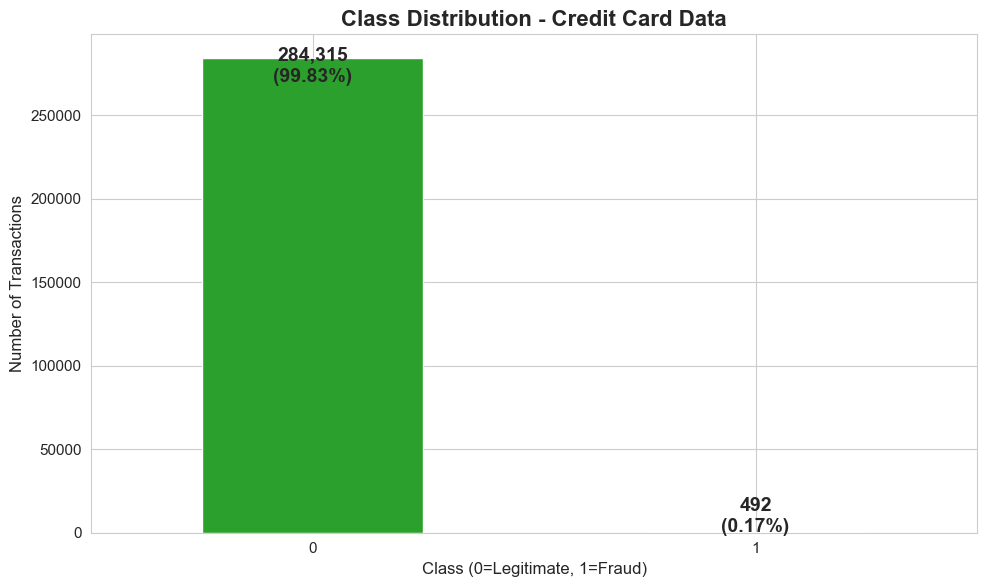

In [3]:
print("=== Class Distribution ===")
class_counts = creditcard_df['Class'].value_counts()
print(class_counts)
print(f"\nFraud Rate: {creditcard_df['Class'].mean():.4f} ({creditcard_df['Class'].mean()*100:.2f}%)")
print(f"Imbalance Ratio: {class_counts[0]/class_counts[1]:.0f}:1")

# Visualize
plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar', color=['#2ca02c', '#d62728'])
plt.title('Class Distribution - Credit Card Data', fontsize=16, fontweight='bold')
plt.xlabel('Class (0=Legitimate, 1=Fraud)', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(rotation=0)

# Add percentage labels
total = len(creditcard_df)
for i, count in enumerate(class_counts):
    percentage = count / total * 100
    plt.text(i, count * 0.95, f'{count:,}\n({percentage:.2f}%)', 
             ha='center', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../outputs/eda/creditcard_class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

Amount Feature Analysis

=== Transaction Amount Statistics ===

Fraudulent transaction amounts:
Mean: $122.21
Median: $9.25
Max: $2125.87

Legitimate transaction amounts:
Mean: $88.29
Median: $22.00
Max: $25691.16


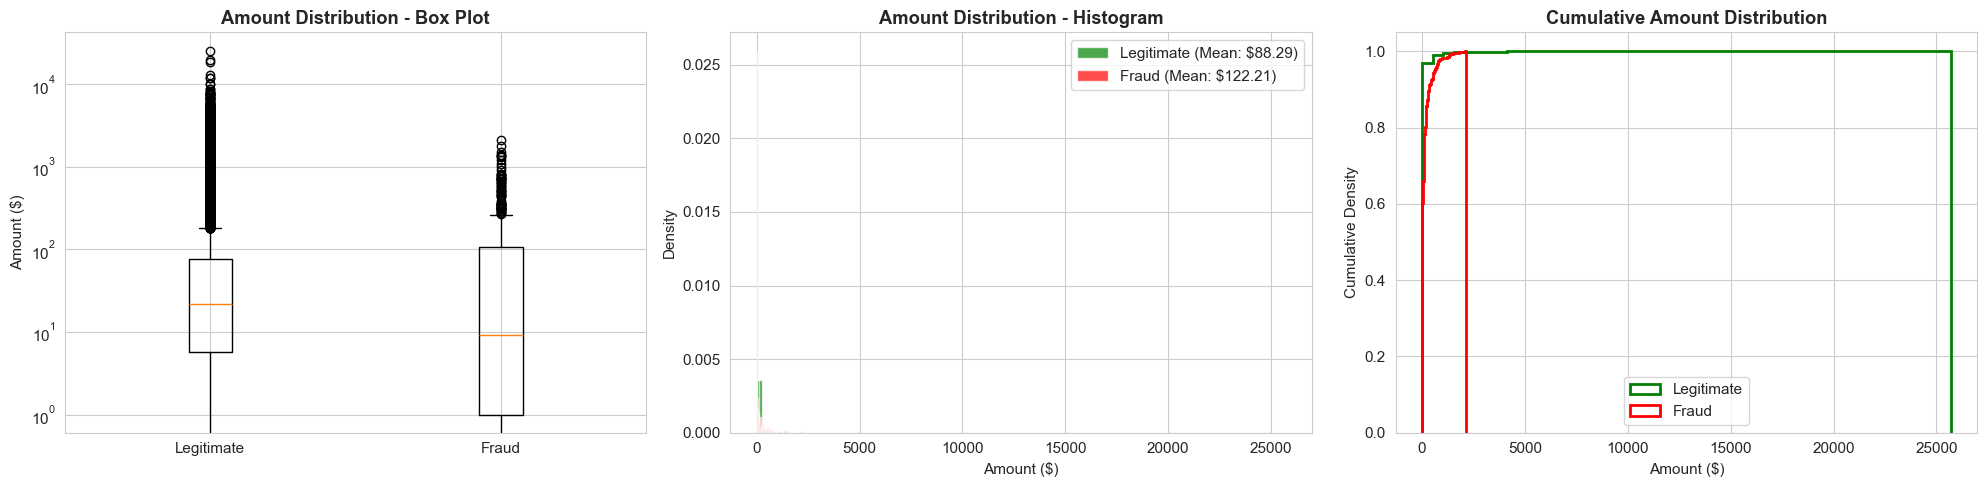

In [5]:
print("=== Transaction Amount Statistics ===")

# Compare fraud vs legitimate amounts
fraud_amounts = creditcard_df[creditcard_df['Class']==1]['Amount']
legit_amounts = creditcard_df[creditcard_df['Class']==0]['Amount']

print(f"\nFraudulent transaction amounts:")
print(f"Mean: ${fraud_amounts.mean():.2f}")
print(f"Median: ${fraud_amounts.median():.2f}")
print(f"Max: ${fraud_amounts.max():.2f}")

print(f"\nLegitimate transaction amounts:")
print(f"Mean: ${legit_amounts.mean():.2f}")
print(f"Median: ${legit_amounts.median():.2f}")
print(f"Max: ${legit_amounts.max():.2f}")

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Box plot
axes[0].boxplot([legit_amounts, fraud_amounts], labels=['Legitimate', 'Fraud'])
axes[0].set_title('Amount Distribution - Box Plot', fontweight='bold')
axes[0].set_ylabel('Amount ($)')
axes[0].set_yscale('log')

# Histogram
axes[1].hist(legit_amounts, bins=100, alpha=0.7, color='green', 
             label=f'Legitimate (Mean: ${legit_amounts.mean():.2f})', density=True)
axes[1].hist(fraud_amounts, bins=100, alpha=0.7, color='red', 
             label=f'Fraud (Mean: ${fraud_amounts.mean():.2f})', density=True)
axes[1].set_title('Amount Distribution - Histogram', fontweight='bold')
axes[1].set_xlabel('Amount ($)')
axes[1].set_ylabel('Density')
axes[1].legend()

# Cumulative distribution
axes[2].hist(legit_amounts, bins=50, cumulative=True, histtype='step', 
             color='green', label='Legitimate', density=True, linewidth=2)
axes[2].hist(fraud_amounts, bins=50, cumulative=True, histtype='step', 
             color='red', label='Fraud', density=True, linewidth=2)
axes[2].set_title('Cumulative Amount Distribution', fontweight='bold')
axes[2].set_xlabel('Amount ($)')
axes[2].set_ylabel('Cumulative Density')
axes[2].legend()

plt.tight_layout()
plt.savefig('../outputs/eda/amount_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

Time Feature Analysis

=== Time Feature Analysis ===
Time range: 0.0 to 172792.0 seconds
Time span: 48.00 hours


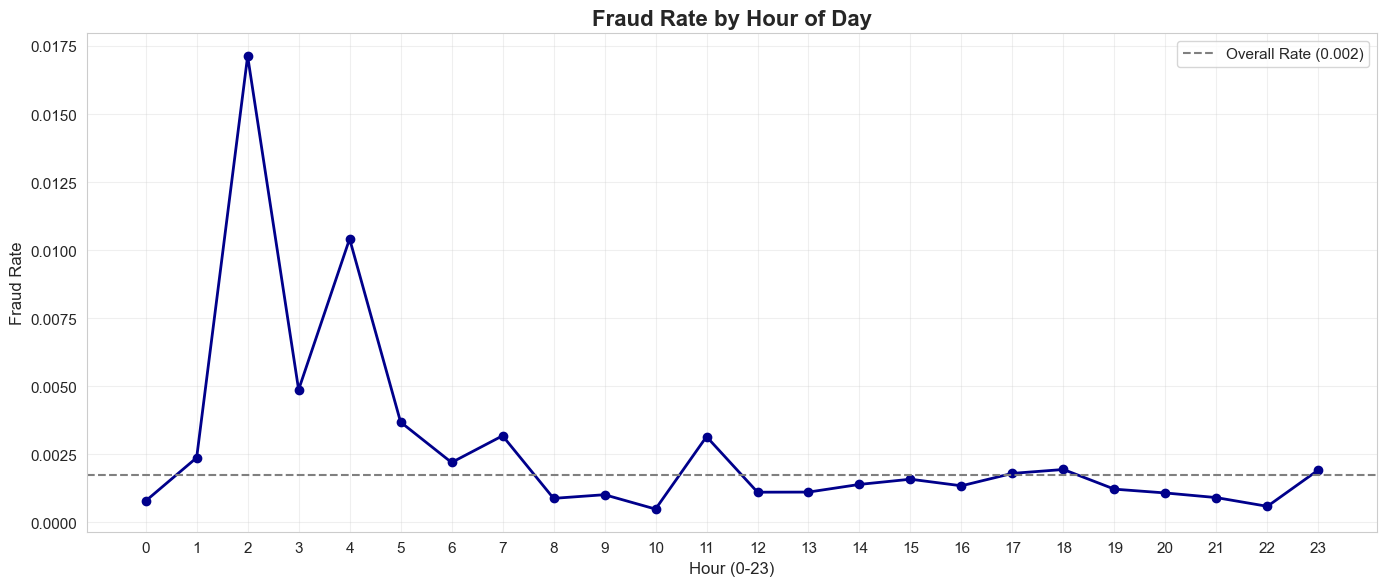

In [6]:
print("=== Time Feature Analysis ===")

# Time feature is in seconds from first transaction
print(f"Time range: {creditcard_df['Time'].min()} to {creditcard_df['Time'].max()} seconds")
print(f"Time span: {creditcard_df['Time'].max() / 3600:.2f} hours")

# Create time-based features
creditcard_df['hour'] = (creditcard_df['Time'] // 3600) % 24
creditcard_df['day'] = (creditcard_df['Time'] // (24 * 3600))

# Hourly fraud rate
hourly_fraud = creditcard_df.groupby('hour')['Class'].agg(['count', 'mean']).reset_index()

plt.figure(figsize=(14, 6))
plt.plot(hourly_fraud['hour'], hourly_fraud['mean'], 
         marker='o', linewidth=2, markersize=6, color='darkblue')
plt.title('Fraud Rate by Hour of Day', fontsize=16, fontweight='bold')
plt.xlabel('Hour (0-23)', fontsize=12)
plt.ylabel('Fraud Rate', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24))
plt.axhline(y=creditcard_df['Class'].mean(), color='gray', linestyle='--', 
            label=f'Overall Rate ({creditcard_df["Class"].mean():.3f})')
plt.legend()
plt.tight_layout()
plt.savefig('../outputs/eda/creditcard_hourly_fraud.png', dpi=300, bbox_inches='tight')
plt.show()


PCA Feature Analysis

In [7]:
print("=== PCA Features Statistics ===")
pca_features = [f'V{i}' for i in range(1, 29)]

# Summary statistics for V1-V28
print(creditcard_df[pca_features].describe())

# Fraud vs Legitimate differences
fraud_mean = creditcard_df[creditcard_df['Class']==1][pca_features].mean()
legit_mean = creditcard_df[creditcard_df['Class']==0][pca_features].mean()
mean_diff = (fraud_mean - legit_mean).abs().sort_values(ascending=False)

print("\n=== Top 10 Features with Largest Mean Differences ===")
print(mean_diff.head(10))

=== PCA Features Statistics ===
                 V1             V2            V3            V4            V5  \
count  2.848070e+05  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.339397e-08       0.000000 -4.800400e-08  6.643411e-09  2.657364e-08   
std    1.958611e+00       1.651183  1.516203e+00  1.415832e+00  1.380180e+00   
min   -5.640751e+01     -72.715729 -4.832559e+01 -5.683171e+00 -1.137433e+02   
25%   -9.203734e-01      -0.598550 -8.903648e-01 -8.486401e-01 -6.915971e-01   
50%    1.810880e-02       0.065486  1.798463e-01 -1.984653e-02 -5.433583e-02   
75%    1.315642e+00       0.803724  1.027196e+00  7.433413e-01  6.119264e-01   
max    2.454930e+00      22.057730  9.382559e+00  1.687534e+01  3.480167e+01   

                 V6            V7            V8            V9           V10  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.500125e-09 -1.071518e-09 -1.071518e-10 -3.214554e-10 -4.071768e-09   
std    1.3

V-Feature Distributions by Class

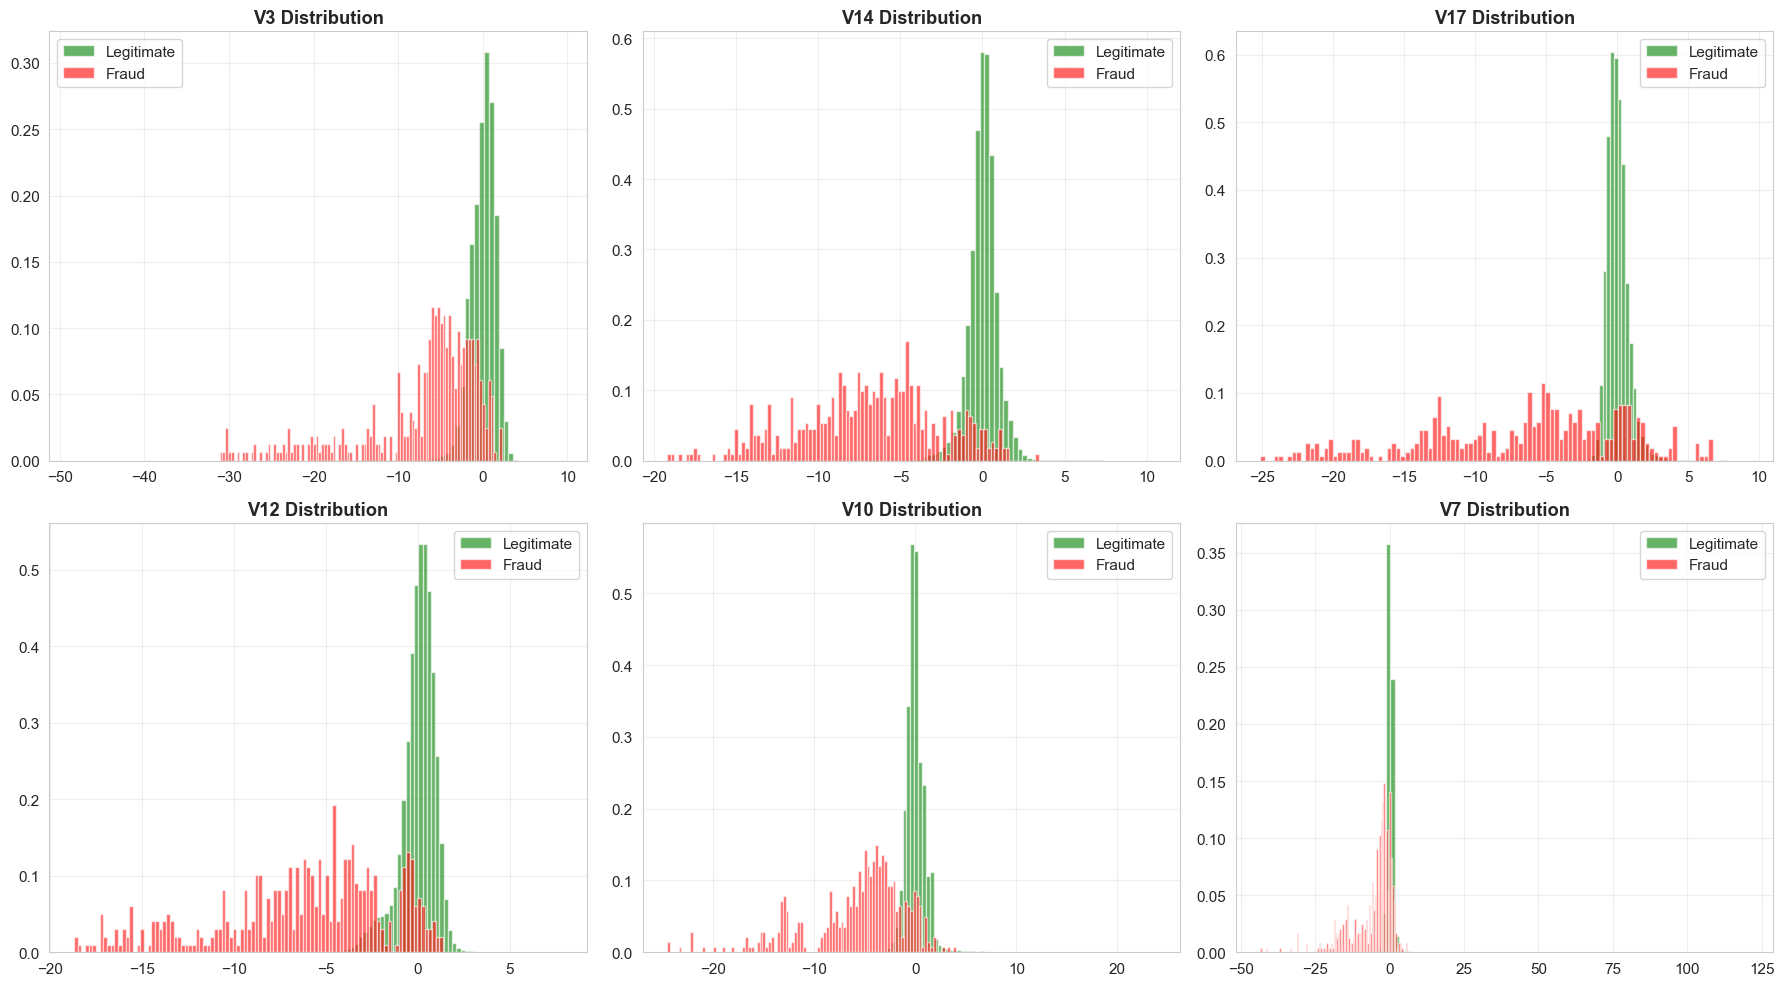

In [8]:
top_features = mean_diff.head(6).index.tolist()

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for idx, feature in enumerate(top_features):
    row, col = idx // 3, idx % 3
    
    # KDE plot
    fraud_series = creditcard_df[creditcard_df['Class']==1][feature]
    legit_series = creditcard_df[creditcard_df['Class']==0][feature]
    
    axes[row, col].hist(legit_series, bins=100, alpha=0.6, color='green', 
                        density=True, label='Legitimate')
    axes[row, col].hist(fraud_series, bins=100, alpha=0.6, color='red', 
                        density=True, label='Fraud')
    axes[row, col].set_title(f'{feature} Distribution', fontweight='bold')
    axes[row, col].legend()
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../outputs/eda/top_v_features.png', dpi=300, bbox_inches='tight')
plt.show()


Correlation Matrix for V-Features

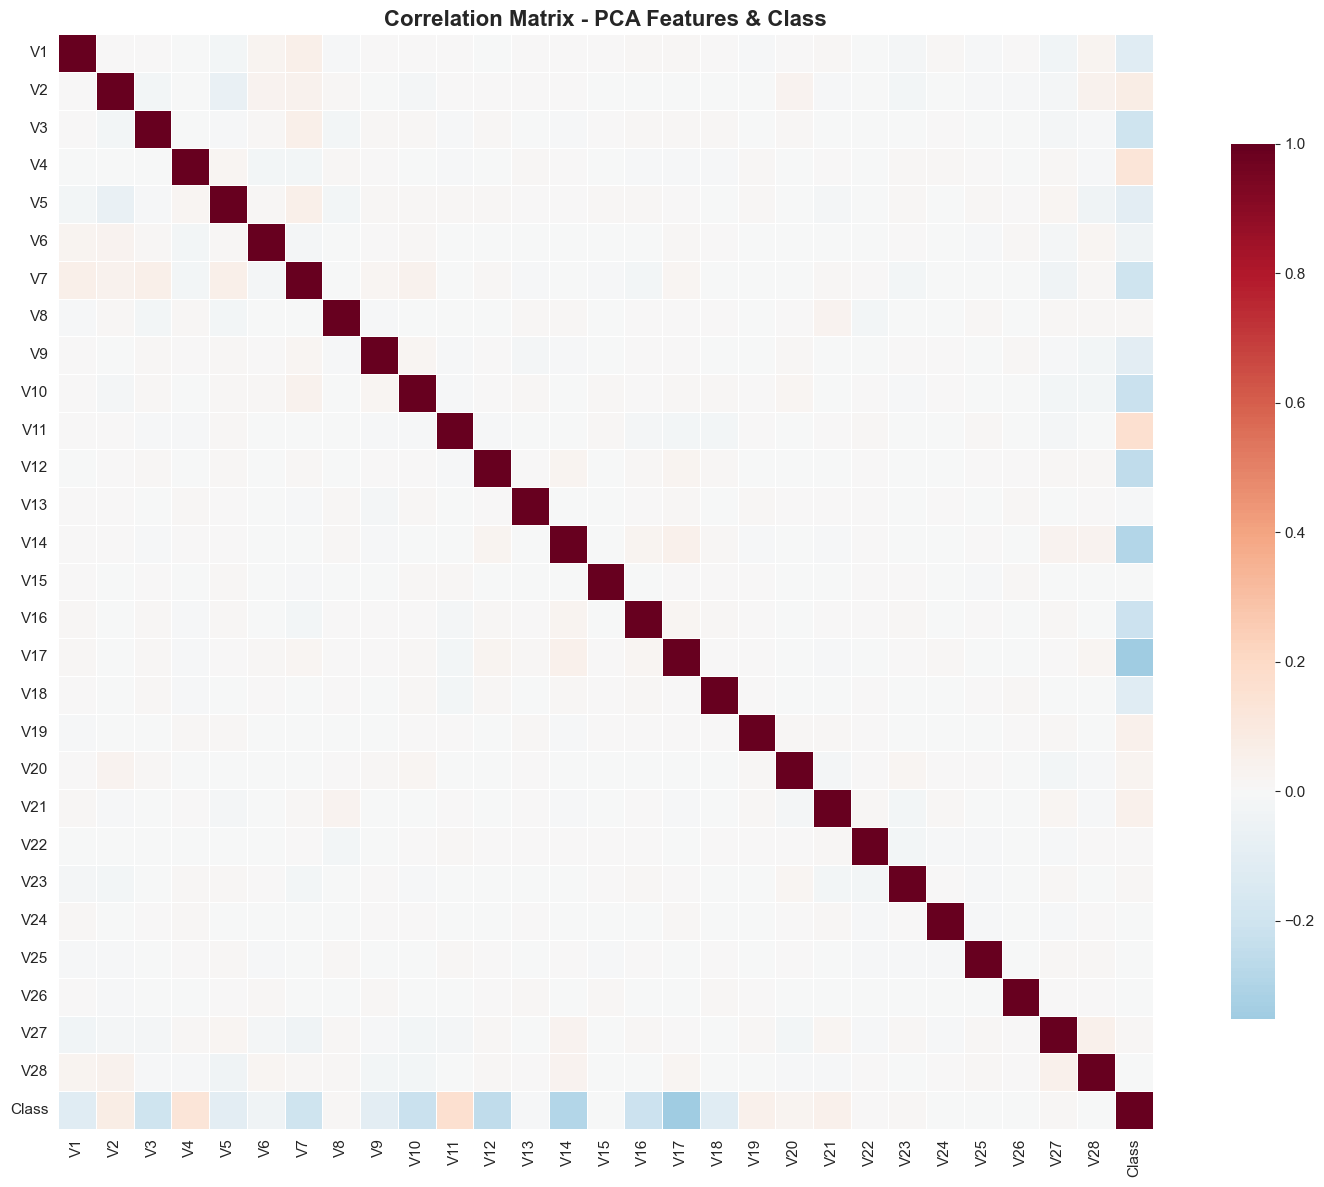

In [9]:
sample_df = creditcard_df.sample(frac=0.1, random_state=42)

# Calculate correlation matrix
corr_matrix = sample_df[pca_features + ['Class']].corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, cmap='RdBu_r', center=0, 
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8},
            annot=False,  # Too many features to annotate
            linewidths=0.5)

plt.title('Correlation Matrix - PCA Features & Class', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('../outputs/eda/v_features_correlation.png', dpi=300, bbox_inches='tight')
plt.show()

Feature Importance via Statistical Tests

In [10]:
from scipy.stats import ttest_ind

print("=== Statistical Significance Tests (Fraud vs Legitimate) ===")

# Perform t-tests for each V feature
test_results = []
for feature in pca_features:
    fraud_values = creditcard_df[creditcard_df['Class']==1][feature]
    legit_values = creditcard_df[creditcard_df['Class']==0][feature]
    
    t_stat, p_value = ttest_ind(fraud_values, legit_values)
    effect_size = (fraud_values.mean() - legit_values.mean()) / np.sqrt(
        ((len(fraud_values)-1)*fraud_values.var() + (len(legit_values)-1)*legit_values.var()) / 
        (len(fraud_values)+len(legit_values)-2)
    )
    
    test_results.append({
        'feature': feature,
        't_statistic': t_stat,
        'p_value': p_value,
        'effect_size': effect_size,
        'mean_diff': fraud_values.mean() - legit_values.mean()
    })

# Create dataframe and sort by p-value
test_df = pd.DataFrame(test_results).sort_values('p_value')
test_df['significant'] = test_df['p_value'] < 0.01

print("Top 15 Most Significant Features:")
print(test_df.head(15).to_string(index=False))

=== Statistical Significance Tests (Fraud vs Legitimate) ===
Top 15 Most Significant Features:
feature  t_statistic       p_value  effect_size  mean_diff  significant
     V1   -54.366066  0.000000e+00    -2.453195  -4.780206         True
    V18   -59.869700  0.000000e+00    -2.701580  -2.250195         True
    V17  -184.334373  0.000000e+00    -8.317905  -6.677371         True
    V16  -106.973587  0.000000e+00    -4.827102  -4.147110         True
    V12  -144.048008  0.000000e+00    -6.500124  -6.270226         True
    V11    83.662139  0.000000e+00     3.775177   3.806749         True
    V10  -118.566349  0.000000e+00    -5.350280  -5.686707         True
     V9   -52.408019  0.000000e+00    -2.364915  -2.585589         True
    V14  -169.397602  0.000000e+00    -7.644046  -6.983788         True
     V7  -101.733004  0.000000e+00    -4.590687  -5.578367         True
     V5   -50.915204  0.000000e+00    -2.297518  -3.156678         True
     V2    48.922412  0.000000e+00     2.

Transaction Amount vs Time Analysis

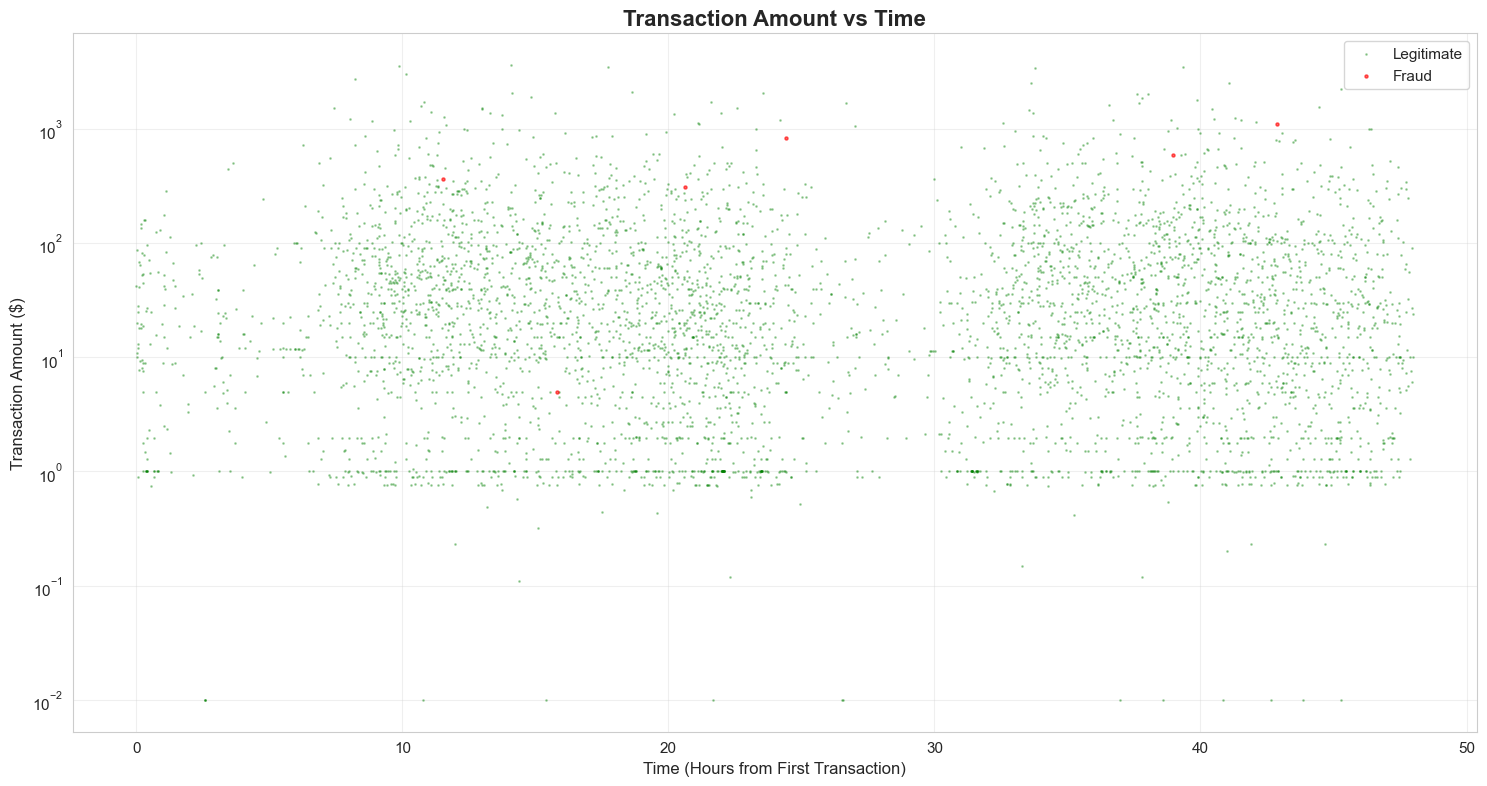

In [11]:
plt.figure(figsize=(15, 8))

# Sample data for visualization
sample_data = creditcard_df.sample(5000, random_state=42)

fraud_sample = sample_data[sample_data['Class']==1]
legit_sample = sample_data[sample_data['Class']==0]

plt.scatter(legit_sample['Time'] / 3600, legit_sample['Amount'], 
            alpha=0.3, s=1, label='Legitimate', color='green')
plt.scatter(fraud_sample['Time'] / 3600, fraud_sample['Amount'], 
            alpha=0.6, s=5, label='Fraud', color='red')
plt.title('Transaction Amount vs Time', fontsize=16, fontweight='bold')
plt.xlabel('Time (Hours from First Transaction)', fontsize=12)
plt.ylabel('Transaction Amount ($)', fontsize=12)
plt.yscale('log')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig('../outputs/eda/amount_vs_time.png', dpi=300, bbox_inches='tight')
plt.show()

Day-over-Day Fraud Analysis

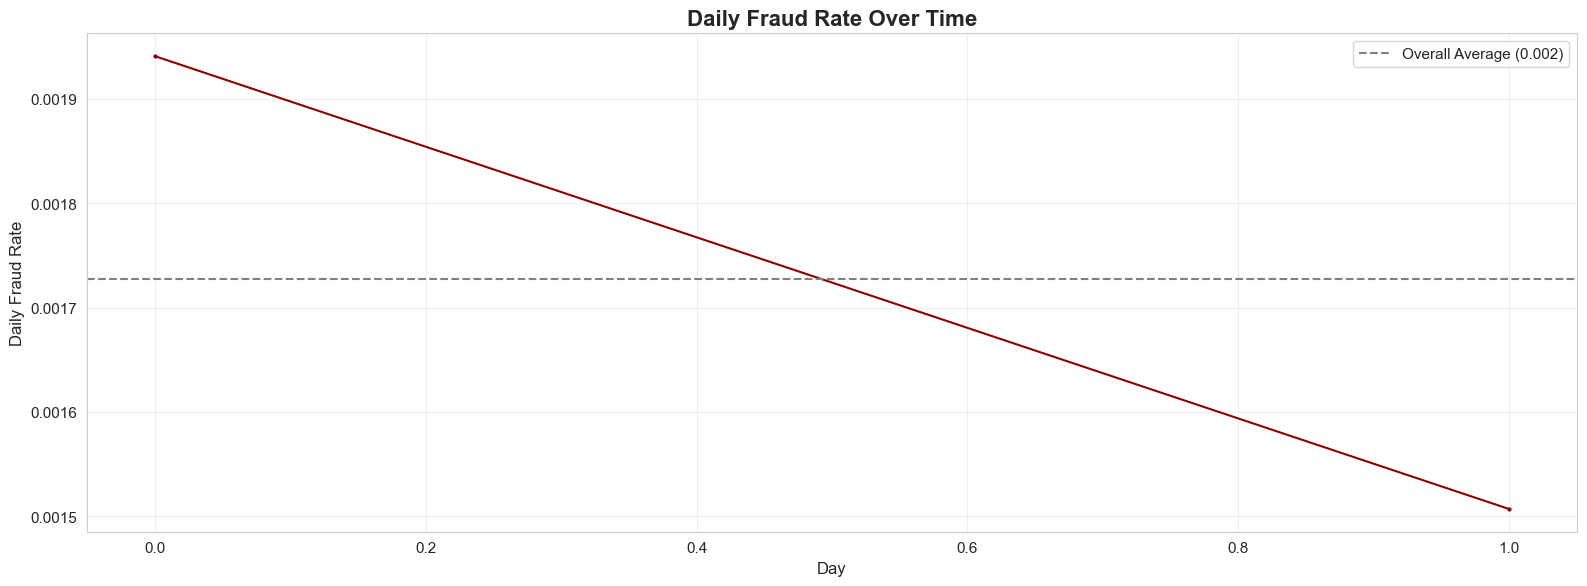

In [12]:
daily_fraud = creditcard_df.groupby('day')['Class'].agg(['count', 'mean']).reset_index()

plt.figure(figsize=(16, 6))
plt.plot(daily_fraud['day'], daily_fraud['mean'], linewidth=1.5, 
         color='darkred', marker='o', markersize=2)
plt.title('Daily Fraud Rate Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Day', fontsize=12)
plt.ylabel('Daily Fraud Rate', fontsize=12)
plt.grid(True, alpha=0.3)
plt.axhline(y=creditcard_df['Class'].mean(), color='gray', linestyle='--', 
            label=f'Overall Average ({creditcard_df["Class"].mean():.3f})')
plt.legend()
plt.tight_layout()
plt.savefig('../outputs/eda/daily_fraud_rate.png', dpi=300, bbox_inches='tight')
plt.show()